In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
os.chdir("/volume1/home/tdeng/SingleCell/scRNA-FeatureSelection/")

%matplotlib inline

In [2]:
# sns.light_palette((0.5, 0.8, 0.5))
# sns.cubehelix_palette()
sns.set_theme(context='notebook', style="darkgrid", font='Arial', palette=sns.cubehelix_palette())

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
sns.light_palette((0.5, 0.8, 0.5))

[(0.9311804011046715, 0.9483346790219837, 0.9310915246617804),
 (0.8449443208837372, 0.9186677432175869, 0.8448732197294243),
 (0.7587082406628028, 0.8890008074131902, 0.7586549147970683),
 (0.6724721604418686, 0.8593338716087935, 0.6724366098647121),
 (0.5862360802209343, 0.8296669358043968, 0.586218304932356),
 (0.5, 0.8, 0.5)]

# scale factor bar plot

In [4]:
scale = pd.read_excel("revision/scale_factor.xlsx", index_col=[0, 1])
scale_ari = scale.loc[:, 'ARI', :].stack().rename('ARI').to_frame().reset_index(names=['Dataset', 's'])
scale_v = scale.loc[:, 'V-measure', :].stack().rename('V-measure').to_frame().reset_index(names=['Dataset', 's'])

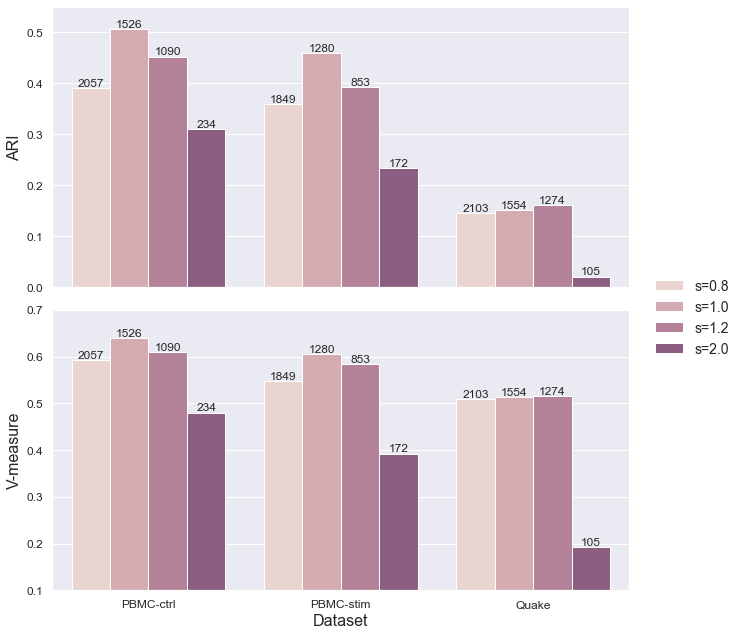

In [5]:
# ['#FF5F81', '#A45CB9', '#A45CB9', '#FAD6EB', '#51DBFF']
# sns.light_palette("seagreen")
# sns.color_palette("light:#124683")

fig, axes = plt.subplots(2, 1, sharex=True, sharey=False, tight_layout=True, figsize=(9, 9))
sns.barplot(x="Dataset", y="ARI", hue="s", ax=axes[0], data=scale_ari)
sns.barplot(x="Dataset", y="V-measure", hue="s", ax=axes[1], data=scale_v)

axes[0].set(xlabel=None, ylim=[0.0, 0.55])
axes[1].set(ylim=[0.1, 0.7])

n_genes = {
    's=0.8': [2057, 1849, 2103],
    's=1.0': [1526, 1280, 1554],
    's=1.2': [1090, 853,  1274],
    's=2.0': [234, 172, 105]
}
for i, s in enumerate(n_genes.keys()):
    axes[0].bar_label(axes[0].containers[i], labels=n_genes[s])
    axes[1].bar_label(axes[1].containers[i], labels=n_genes[s])

axes[0].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels)
axes[1].get_legend().remove()
sns.move_legend(
    fig, "center left",
    bbox_to_anchor=(1, 0.5), title=None, frameon=False,
)
plt.savefig('revision/scale_factor.png', bbox_inches='tight', dpi=1000)

# relevance percent bar plot

In [6]:
rel = pd.read_excel("revision/relevance_pct.xlsx", index_col=[0,1], converters={0:str,'ages':str})
rel.columns = ['10%', '20%', '40%', '60%']
rel_ari = rel.loc[:, 'ARI', :].stack().rename('ARI').to_frame().reset_index(names=['Dataset', 'r'])
rel_v = rel.loc[:, 'V-measure', :].stack().rename('V-measure').to_frame().reset_index(names=['Dataset', 'r'])

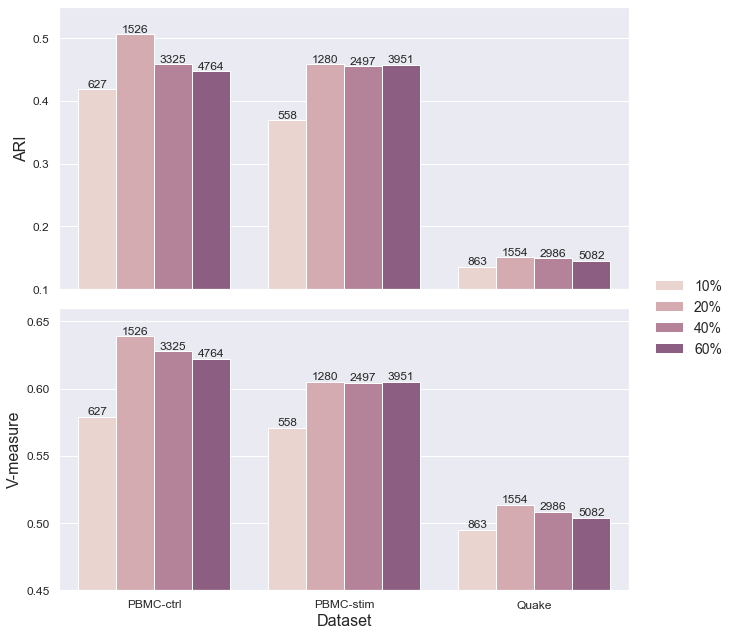

In [7]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=False, tight_layout=True, figsize=(9, 9))
sns.barplot(x="Dataset", y="ARI", hue="r", ax=axes[0], data=rel_ari)
sns.barplot(x="Dataset", y="V-measure", hue="r", ax=axes[1], data=rel_v)

axes[0].set(xlabel=None, ylim=[0.1, 0.55])
axes[1].set(ylim=[0.45, 0.66], yticks=np.arange(0.45, 0.70, 0.05))

n_genes = {
    '10%': [627, 558, 863],
    '20%': [1526, 1280, 1554],
    '40%': [3325, 2497,  2986],
    '60%': [4764, 3951, 5082]
}
for i, s in enumerate(n_genes.keys()):
    axes[0].bar_label(axes[0].containers[i], labels=n_genes[s])
    axes[1].bar_label(axes[1].containers[i], labels=n_genes[s])

axes[0].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels)
axes[1].get_legend().remove()
sns.move_legend(
    fig, "center left",
    bbox_to_anchor=(1, 0.5), title=None, frameon=False,
)
plt.savefig('revision/relevance_pct.png', bbox_inches='tight', dpi=1000)